In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

2. вариант2) COVID19 EDA для любой страны кроме Китая с длиной ряда больше 50 дней ( можно обновить данные по ссылке).

3. вариант 1) Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )



In [2]:
COVID_ = pd.read_csv('covid_19_data.csv')
COVID_.head(20)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [3]:
COVID_['Country/Region'].value_counts()

US                     4468
Mainland China         3408
Canada                  964
Australia               716
France                  653
                       ... 
Cape Verde                1
 Azerbaijan               1
St. Martin                1
Republic of Ireland       1
Channel Islands           1
Name: Country/Region, Length: 222, dtype: int64

In [4]:
COVID = COVID_.copy()
COVID['Data'] = pd.to_datetime(COVID['ObservationDate']).dt.date
COVID_['Data'] = pd.to_datetime(COVID_['ObservationDate']).dt.date
COVID


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Data
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22
...,...,...,...,...,...,...,...,...,...
23476,23477,05/10/2020,Wyoming,US,2020-05-11 02:32:30,662.0,7.0,0.0,2020-05-10
23477,23478,05/10/2020,Xinjiang,Mainland China,2020-05-11 02:32:30,76.0,3.0,73.0,2020-05-10
23478,23479,05/10/2020,Yukon,Canada,2020-05-11 02:32:30,11.0,0.0,0.0,2020-05-10
23479,23480,05/10/2020,Yunnan,Mainland China,2020-05-11 02:32:30,185.0,2.0,183.0,2020-05-10


In [5]:
COVID = COVID.groupby([ 'Data', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].sum()
COVID

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Confirmed  Deaths  Recovered
Data       Country/Region                                  
2020-01-22 Hong Kong                 0.0     0.0        0.0
           Japan                     2.0     0.0        0.0
           Macau                     1.0     0.0        0.0
           Mainland China          547.0    17.0       28.0
           South Korea               1.0     0.0        0.0
...                                  ...     ...        ...
2020-05-10 West Bank and Gaza      375.0     2.0      263.0
           Western Sahara            6.0     0.0        5.0
           Yemen                    51.0     8.0        1.0
           Zambia                  267.0     7.0      117.0
           Zimbabwe                 36.0     4.0        9.0

[12993 rows x 3 columns]

нарисуем для США

ПОСЛЕ ГРУППИРОВКИ LOC просто не работает нужно index.get_level_values

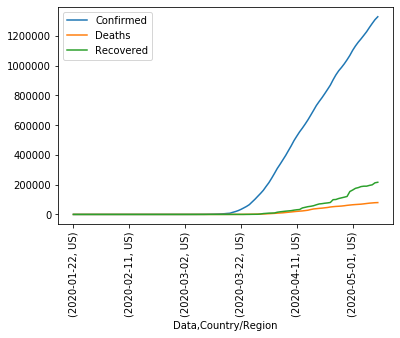

In [6]:
COVID.loc[COVID.index.get_level_values('Country/Region')=='US', ['Confirmed', 'Deaths', 'Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation = 90)
plt.show()

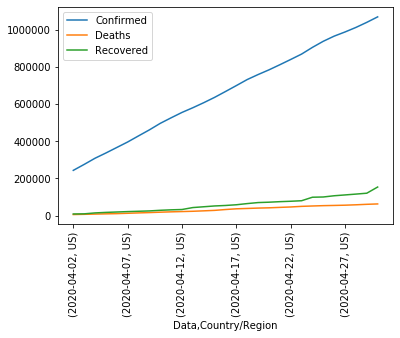

In [7]:
COVID.loc[(COVID.index.get_level_values('Country/Region')=='US') & (COVID.index.get_level_values('Data')> pd.to_datetime('2020-04-01')) & (COVID.index.get_level_values('Data')< pd.to_datetime('2020-05-01')), ['Confirmed', 'Deaths', 'Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation = 90)
plt.show()


In [8]:
COVID_.loc[( (COVID_[ 'Country/Region']=='US') & (COVID_['Data'] > pd.to_datetime('2020-04-01'))& (COVID_['Data'] < pd.to_datetime('2020-05-01'))), :].head(50)
# COVID.loc[((COVID['Country/Region']=='US') & (COVID['Data']> pd.to_datetime('2020-04-01')) & (COVID['Data']< pd.to_datetime('2020-05-01'))), :]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Data
11159,11160,04/02/2020,Alabama,US,4/2/20 8:53,1233.0,32.0,0.0,2020-04-02
11160,11161,04/02/2020,Alaska,US,4/2/20 8:53,143.0,3.0,0.0,2020-04-02
11164,11165,04/02/2020,Arizona,US,4/2/20 8:53,1715.0,32.0,0.0,2020-04-02
11165,11166,04/02/2020,Arkansas,US,4/2/20 8:53,643.0,12.0,0.0,2020-04-02
11173,11174,04/02/2020,California,US,4/2/20 8:53,10773.0,238.0,0.0,2020-04-02
11177,11178,04/02/2020,Colorado,US,4/2/20 8:53,3342.0,80.0,0.0,2020-04-02
11178,11179,04/02/2020,Connecticut,US,4/2/20 8:53,3824.0,112.0,0.0,2020-04-02
11180,11181,04/02/2020,Delaware,US,4/2/20 8:53,393.0,12.0,0.0,2020-04-02
11182,11183,04/02/2020,Diamond Princess cruise ship,US,4/2/20 8:53,49.0,0.0,0.0,2020-04-02
11183,11184,04/02/2020,District of Columbia,US,4/2/20 8:53,653.0,12.0,0.0,2020-04-02


первые разности 

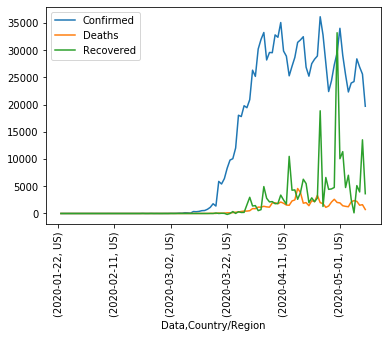

In [9]:
COVID.loc[COVID.index.get_level_values('Country/Region')=='US', ['Confirmed', 'Deaths', 'Recovered']].diff(1).plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation = 90)
plt.show()

Построим признаки
1) Первая разность (производная ряда) - разница с(t)-c(t-1) по всем t


In [10]:
X1 = COVID.loc[COVID.index.get_level_values( 'Country/Region')=='US', ['Confirmed','Deaths','Recovered']].diff(1).values
X1[0,:] = 0

2) Сами значения элементов ряда по времени

In [11]:
X2 = COVID.loc[COVID.index.get_level_values( 'Country/Region')=='US', ['Confirmed','Deaths','Recovered']].values

In [12]:
X1.shape

(110, 3)

In [13]:
X2.shape

(110, 3)

3) Добавим признаков по календарю

In [14]:
X3 = COVID.iloc[COVID.index.get_level_values( 'Country/Region')=='US'].index.get_level_values( 'Data')
X3

Index([2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26, 2020-01-27,
       2020-01-28, 2020-01-29, 2020-01-30, 2020-01-31,
       ...
       2020-05-01, 2020-05-02, 2020-05-03, 2020-05-04, 2020-05-05, 2020-05-06,
       2020-05-07, 2020-05-08, 2020-05-09, 2020-05-10],
      dtype='object', name='Data', length=110)

3.1) - день недели по счету

3.2) - день от начала статистики в текущей таблице (для Китая - 1-й день карантина(возможно), для других стран следует посмотреть на первый не 0-й экземпляр по 'Confirmed') - строим как "текущий день года" - "первый день от начала отсчета данных по номеру в году"

In [15]:
X3_1 = pd.to_datetime(X3).dayofweek
X3_2 = pd.to_datetime(X3).dayofyear -  pd.to_datetime(X3[0]).dayofyear

Собирем все в кучу

In [16]:
XX = np.concatenate([X1,X2], axis= 1)

In [17]:
XX.shape


(110, 6)

In [18]:
XX = np.concatenate([XX,np.array(X3_1).reshape((XX.shape[0],1))], axis= 1)

XX.shape

(110, 7)

In [19]:
XX = np.concatenate([XX,np.array(X3_2).reshape(XX.shape[0],1)], axis= 1)
XX.shape

(110, 8)

Таблица признаков для CША

In [20]:
COVID_Data = pd.DataFrame(data= XX, index= X3)
COVID_Data.head()


,0,1,2,3,4,5,6,7
Data,,,,,,,,
2020-01-22,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
2020-01-23,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0
2020-01-24,1.0,0.0,0.0,2.0,0.0,0.0,4.0,2.0
2020-01-25,0.0,0.0,0.0,2.0,0.0,0.0,5.0,3.0
2020-01-26,3.0,0.0,0.0,5.0,0.0,0.0,6.0,4.0


Сделаем данные для модели:

необходимо определить как далеко будем смотреть назад по ряду от текущего дня - это параметр р - глубина истории

необходимо определить как далеко будем смотреть вперед (предсказывать) - это горизонт прогноза h

In [21]:
p = 10 # 10 дней назад по истории
h=1    # 1 день вперед предсказываем

Строим выходную часть данных:

предсказываем значения заболеваемости (т.е. признак COVID_Dat.iloc[:,3])

сдвигаем точку предсказания на длину истории р (т.к. не можем предсказывать имея меньше чем р данных для анализа) и ставим первой предсказываемой точкой точку p+h , h - горизонт предсказания

In [22]:
y = COVID_Data.iloc[h+p:,3]
y


Data
2020-02-02          8.0
2020-02-03         11.0
2020-02-04         11.0
2020-02-05         12.0
2020-02-06         12.0
                ...    
2020-05-06    1228603.0
2020-05-07    1257023.0
2020-05-08    1283929.0
2020-05-09    1309550.0
2020-05-10    1329260.0
Name: 3, Length: 99, dtype: float64

Строим данные для входной части модели:

наши р дней истории по всем признакам начиная от 0-го дня используем блоками XX[i:i+p,:] для i = 0,64

последний предсказываемый день будет 75-й (5.04.2020), т.е. данные для предсказания кончаются в 74-й день (4.04.2020)

векторизируем весь блок данных истории в вектор длины 8*р и дописываем в примеры для обучения X

In [23]:
X =[]
for i in range(len(y)):
    xx = XX[i:i+p,:]
    X.append(xx.reshape(8*p))
len(X)

### ТАК ТОЖЕ РАБОТАЕТ
# X =[]
# for i in range(len(y)):
#     xx = XX[i:i+p,:]
#     X.append(xx)
# len(X)

99

Приводим все к одному виду для обработки в модели

In [24]:
X = np.array(X).reshape((COVID_Data.shape[0]-p-h,8*p))
y=np.array(y).reshape((COVID_Data.shape[0]-p-h,1))

In [25]:
X.shape

(99, 80)

In [26]:
y.shape

(99, 1)

Можно строить модель

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

N=-10
x_train,y_train,x_test,y_test=X[:N,:],y[:N,:],X[N:,:],y[N:,:]
# пока строим одну
model_lb = LinearRegression()

In [28]:
model_lb.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred_test = model_lb.predict(x_test)
y_pred_train = model_lb.predict(x_train)

In [30]:
error_ =np.mean(np.abs(y_pred_test-y_test))
print(error_)

49217.278603226834


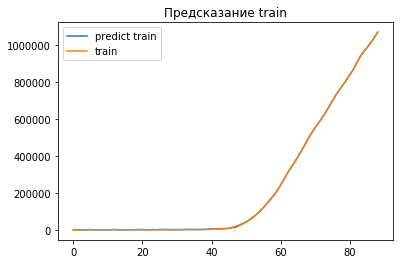

In [31]:
plt.plot(y_pred_train, label='predict train')
plt.plot(y_train, label='train')
plt.legend()
plt.title('Предсказание train')
plt.show()

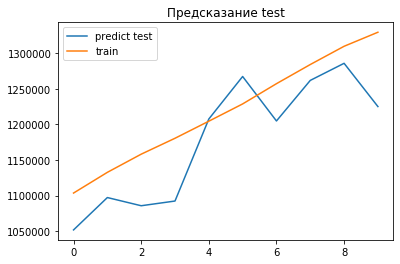

In [32]:
plt.plot(y_pred_test, label='predict test')
plt.plot(y_test, label='train')
plt.legend()
plt.title('Предсказание test')
plt.show()

In [33]:
error_p =np.mean(np.abs(y_pred_test-y_test)/y_test)*100

print('error in MAPE :', error_p, '%')

error in MAPE : 4.050105463687416 %


# 3. вариант 2) Сделайте ресемплинг COVID19 на интервалы 3 дня, неделя, 2 недели.Постройте график изменения среднего по выборке и среднего отклонения по выборке на группах для интервалах 3 дня, неделя, 2 недели (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

In [34]:
COVID2 = pd.read_csv('covid_19_data.csv').set_index('ObservationDate')
# COVID2 
COVID2.index = pd.to_datetime(COVID2.index)
COVID2 

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2020-05-10,23477,Wyoming,US,2020-05-11 02:32:30,662.0,7.0,0.0
2020-05-10,23478,Xinjiang,Mainland China,2020-05-11 02:32:30,76.0,3.0,73.0
2020-05-10,23479,Yukon,Canada,2020-05-11 02:32:30,11.0,0.0,0.0


In [35]:
COVID2['date'] = COVID2.index



In [36]:
COVID2.head()
COVID2

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date
ObservationDate,,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22
...,...,...,...,...,...,...,...,...
2020-05-10,23477,Wyoming,US,2020-05-11 02:32:30,662.0,7.0,0.0,2020-05-10
2020-05-10,23478,Xinjiang,Mainland China,2020-05-11 02:32:30,76.0,3.0,73.0,2020-05-10
2020-05-10,23479,Yukon,Canada,2020-05-11 02:32:30,11.0,0.0,0.0,2020-05-10


In [37]:
COVID2.resample("3d")


COVID3 = COVID2.loc[COVID2[ 'Country/Region']=='US' , :]
COVID3

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date
ObservationDate,,,,,,,,
2020-01-22,32,Washington,US,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
2020-01-23,70,Washington,US,1/23/20 17:00,1.0,0.0,0.0,2020-01-23
2020-01-24,118,Washington,US,1/24/20 17:00,1.0,0.0,0.0,2020-01-24
2020-01-24,119,Chicago,US,1/24/20 17:00,1.0,0.0,0.0,2020-01-24
2020-01-25,159,Washington,US,1/25/20 17:00,1.0,0.0,0.0,2020-01-25
...,...,...,...,...,...,...,...,...
2020-05-10,23472,Virginia,US,2020-05-11 02:32:30,24081.0,839.0,0.0,2020-05-10
2020-05-10,23473,Washington,US,2020-05-11 02:32:30,16891.0,931.0,0.0,2020-05-10
2020-05-10,23474,West Virginia,US,2020-05-11 02:32:30,1360.0,54.0,0.0,2020-05-10


In [38]:
COVID2.resample("W").apply(['mean']).head()

,SNo,Confirmed,Deaths,Recovered
,mean,mean,mean,mean
ObservationDate,,,,
2020-01-26,108.5,26.412037,0.736111,0.856481
2020-02-02,422.0,150.012165,3.287105,3.442822
2020-02-09,875.5,431.231855,9.167339,24.106855
2020-02-16,1382.0,774.280464,18.518375,93.601547
2020-02-23,1918.0,963.360360,27.787387,227.753153


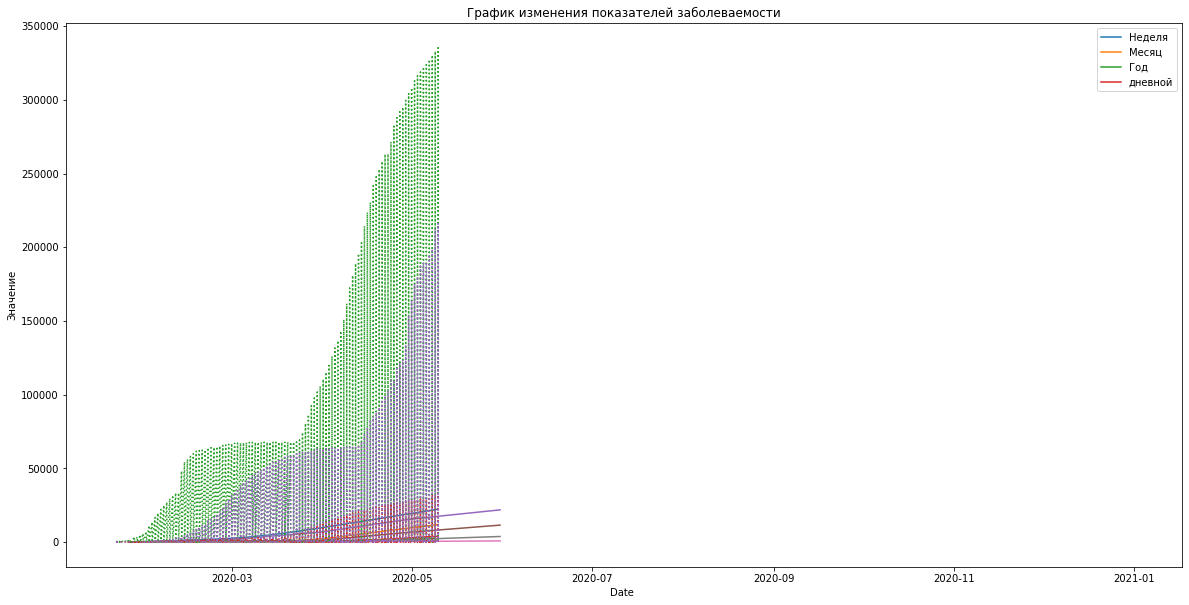

In [39]:
plt.figure(figsize=(20,10))
plt.plot(COVID2.resample("W").mean().index, COVID2.resample("W").mean().values)
plt.plot(COVID2.resample("M").mean().index, COVID2.resample("M").mean().values)
plt.plot(COVID2.resample("Y").mean().index, COVID2.resample("Y").mean().values)

plt.plot(COVID2.index, COVID2[['Confirmed','Deaths', 'Recovered']].values, ':')


plt.legend(['Неделя', 'Месяц', 'Год', 'дневной'])

plt.title('График изменения показателей заболеваемости')
plt.xlabel('Date ')
plt.ylabel('Значение');

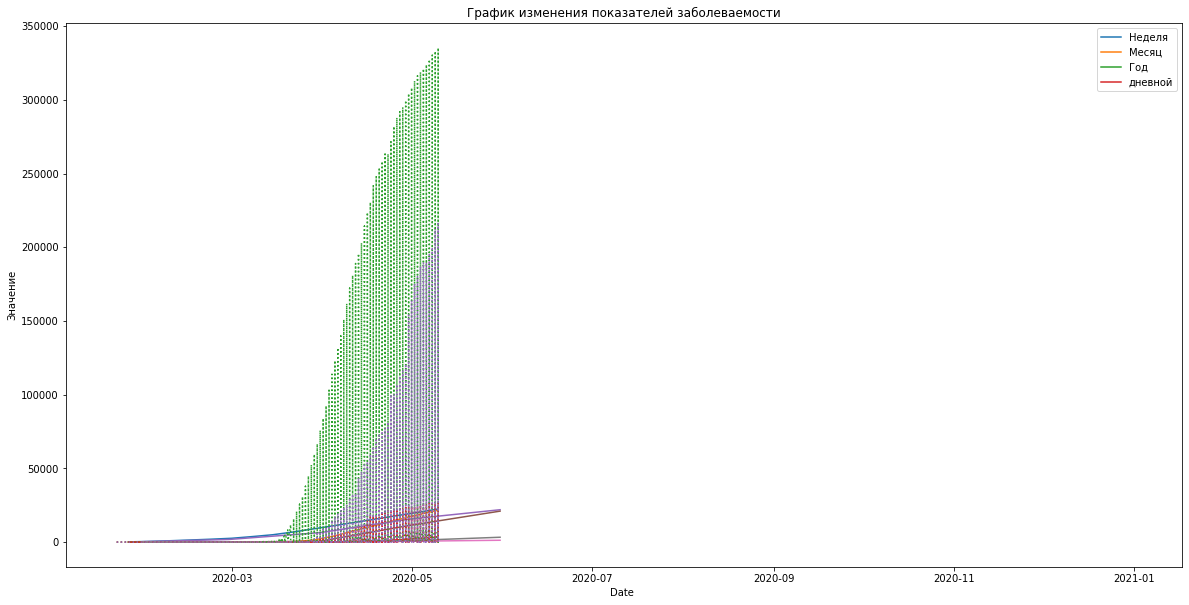

In [43]:
plt.figure(figsize=(20,10))
plt.plot(COVID3.resample("W").mean().index, COVID3.resample("W").mean().values)
plt.plot(COVID3.resample("M").mean().index, COVID3.resample("M").mean().values)
plt.plot(COVID3.resample("Y").mean().index, COVID3.resample("Y").mean().values)

plt.plot(COVID3.index, COVID3[['Confirmed','Deaths', 'Recovered']].values, ':')


plt.legend(['Неделя', 'Месяц', 'Год', 'дневной'])

plt.title('График изменения показателей заболеваемости')
plt.xlabel('Date ')
plt.ylabel('Значение');

In [41]:
len(COVID3) == len(COVID2)

False